In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
import nltk
from nltk.corpus import stopwords

In [4]:
path = 'storage/yelp_data/health_raw00.csv'

In [5]:
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54756 entries, 0 to 54755
Data columns (total 12 columns):
business_id    54756 non-null object
name           54756 non-null object
categories     54756 non-null object
cool           54756 non-null int64
date           54756 non-null object
funny          54756 non-null int64
review_id      54756 non-null object
stars          54756 non-null int64
text           54756 non-null object
useful         54756 non-null int64
user_id        54756 non-null object
len_text       54756 non-null int64
dtypes: int64(5), object(7)
memory usage: 5.0+ MB


In [7]:
df.head()

,business_id,name,categories,cool,date,funny,review_id,stars,text,useful,user_id,len_text
0,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2018-03-03,0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,2,xv2V2GO5IZYvtw4oW7gQ1w,2002
1,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2015-11-29,0,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,1,SjvWP7c9toeZoV_q62zhTA,877
2,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-06-03,0,BmNDRCV9_NzQ_KCChyfdEw,4,Dr. Byrne is a great doctor! She has great bed...,2,sZVHm1aLtvyH9trAc2_MgA,333
3,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2017-03-17,0,t_TKVMxKFYm9Hl-TIO7UUw,3,I'm raising my review as Dr Bryne's has been m...,3,8Y_irXocZdZxLs_qgzpjBw,649
4,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-08-31,0,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,1,hVKPDGpG12z7vpScXaSakw,1408


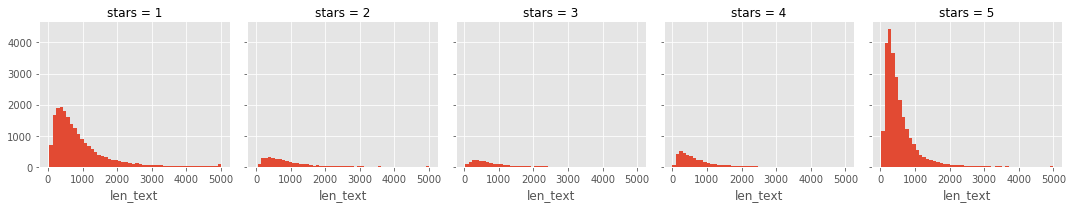

In [8]:
g = sns.FacetGrid(data=df, col='stars')
g.map(plt.hist, 'len_text', bins=50)

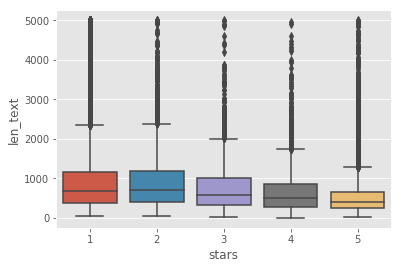

In [9]:
sns.boxplot(x='stars', y='len_text', data=df)

# Independent and dependent variables

In [10]:
yelp_class = df[(df['stars'] == 1) | (df['stars'] == 5)]

In [11]:
yelp_class.head()

,business_id,name,categories,cool,date,funny,review_id,stars,text,useful,user_id,len_text
0,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2018-03-03,0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,2,xv2V2GO5IZYvtw4oW7gQ1w,2002
1,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2015-11-29,0,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,1,SjvWP7c9toeZoV_q62zhTA,877
4,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-08-31,0,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,1,hVKPDGpG12z7vpScXaSakw,1408
5,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2018-05-06,0,jX47gPdL1ta_OTt5HgDSGQ,1,I went to the emergency room because i was hav...,1,KZ2_AsAYr3iSsUfK06W-aw,2985
6,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2017-10-16,0,LSCLa-SIOgaOxP4r3VjX-A,5,Dr. Byrne is an excellent doctor with all the ...,3,OrsSCQlWIOiitqDSzwn4bQ,1201


## change to binary
- 1 stars will become 0
- 5 starts will become 1

In [12]:
yelp_class.stars.replace(1,0,inplace=True)
yelp_class.stars.replace(5,1,inplace=True)

In [13]:
yelp_class.head()

,business_id,name,categories,cool,date,funny,review_id,stars,text,useful,user_id,len_text
0,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2018-03-03,0,TNNkSmMfshsD3G60jTNjDA,0,Please stay away from this place if you can! I...,2,xv2V2GO5IZYvtw4oW7gQ1w,2002
1,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2015-11-29,0,v-iKdstPdCxJr8zV1ZMdrw,1,My husband has been a patient of Dr. Byrne for...,1,SjvWP7c9toeZoV_q62zhTA,877
4,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-08-31,0,NWRrpGRgWZBBj3lvCZGVKA,0,I wish I could give 0 stars. Worst office I've...,1,hVKPDGpG12z7vpScXaSakw,1408
5,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2018-05-06,0,jX47gPdL1ta_OTt5HgDSGQ,0,I went to the emergency room because i was hav...,1,KZ2_AsAYr3iSsUfK06W-aw,2985
6,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2017-10-16,0,LSCLa-SIOgaOxP4r3VjX-A,1,Dr. Byrne is an excellent doctor with all the ...,3,OrsSCQlWIOiitqDSzwn4bQ,1201


In [14]:
X = yelp_class['text']
y = yelp_class['stars']

In [15]:
X[0:10]

0     Please stay away from this place if you can! I...
1     My husband has been a patient of Dr. Byrne for...
4     I wish I could give 0 stars. Worst office I've...
5     I went to the emergency room because i was hav...
6     Dr. Byrne is an excellent doctor with all the ...
7     Worst place ever. Dr Bryne had to reschedule m...
8     Update to my last review.  My situation got ev...
9     I'm going to follow Jacie's example and give y...
11    dr. mario quesada both of my arthroscopic knee...
12    Waited over an hour after my scheduled appoint...
Name: text, dtype: object

# Text pre-processing
The main issue with our data is that it is all in plain-text format.

In [16]:
X[0]

'Please stay away from this place if you can! It\'s the worst care imaginable! The staff is very uneducated and doesn\'t know anything. If you ask a question they give you an answer that doesn\'t even pertain to what you just asked. It\'s super bizarre. Dr Byrne doesn\'t seem to care at all about how you feel I got the impression she just wants to get you in and out and make her money. That\'s just the feeling that was put out there in my visit. The staff is super rude. I wanted to speak again with dr Byrne and they wouldn\'t allow it literally 3 minutes after my procedure. It\'s like she goes behind a secure door where she can\'t be bothered ever again unless you schedule another appointment so they can squeeze you for another office visit . I\'m in so much pain after a procedure they said wouldn\'t hurt. She lied to me about being put under for the procedure. She said I had the option and scheduled me for an office visit where they don\'t offer that option and of course after driving

The classification algorithm will need some sort of feature vector in order to perform the classification task. The simplest way to convert a corpus to a vector format is the bag-of-words approach, where each unique word in a text will be represented by one number.
First, let’s write a function that will split a message into its individual words, and return a list. We will also remove the very common words (such as “the”, “a”, “an”, etc.), also known as stopwords. To do this, we can take advantage of the NLTK library. The function below removes punctuation, stopwords, and returns a list of the remaining words, or tokens.

In [17]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

To check if the function works, let’s pass in some random text and see if it gets processed correctly.

In [18]:
sample_text = "Hey there! This is a sample review, which hap'pens to contain punctuations."

In [19]:
print(sample_text)

Hey there! This is a sample review, which hap'pens to contain punctuations.


In [20]:
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
%%time
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

CPU times: user 12min 50s, sys: 1min 17s, total: 14min 8s
Wall time: 14min 40s


Now, we can look at the size of the vocabulary stored in the vectoriser (based on X) like this:

In [24]:
len(bow_transformer.vocabulary_)

74780

In [25]:
review_21 = X[21]
print(review_21)

i have never been treated so poorly in my life. i will never go back to this office ! they are unbelievably rude and have the absolute worst bedside manner i have ever experienced from start to finish.  
even though they had me in their system they could not find my "chart" so they decided to charge me new patient prices...even though i was clearly a patient previously. i had spent lots of time on the phone with the finance lady (like a car dealer, odd) telling her exactly what i was coming in for so financially i knew what to expect.... because last time i recieved and $800 bill, yup thats right....$800!!!!! seemed a little excessive for a pap and routine labs...they sure like taking advantage of the cash pay people which is sad especially since i'm sure they do their fair share of ripping off insurance companies. anyway, i was told to come in early for appointment, i wound up waiting over an hour in the waiting room, no one would acknowledge me so i finally asked when they could see 

In [26]:
import numpy as np
np.set_printoptions(threshold=np.inf)

Now let’s see our review represented as a vector:


In [27]:
bow_21 = bow_transformer.transform([review_21])

In [28]:
type(bow_21)

scipy.sparse.csr.csr_matrix

In [29]:
bow_21.shape

(1, 74780)

In [30]:
print(bow_21)

  (0, 3512)	1
  (0, 30251)	1
  (0, 31441)	1
  (0, 31663)	1
  (0, 31796)	1
  (0, 31885)	1
  (0, 31936)	1
  (0, 32223)	1
  (0, 32284)	1
  (0, 32301)	1
  (0, 32937)	1
  (0, 33149)	1
  (0, 33173)	1
  (0, 33316)	1
  (0, 33619)	1
  (0, 33767)	1
  (0, 34427)	2
  (0, 34926)	1
  (0, 35298)	1
  (0, 35603)	1
  (0, 36154)	1
  (0, 36321)	1
  (0, 36338)	1
  (0, 36788)	2
  (0, 36825)	1
  :	:
  (0, 68798)	1
  (0, 68819)	1
  (0, 69083)	1
  (0, 69097)	1
  (0, 69184)	1
  (0, 69363)	1
  (0, 69583)	1
  (0, 69606)	1
  (0, 69716)	2
  (0, 69935)	2
  (0, 70242)	4
  (0, 70715)	2
  (0, 70932)	1
  (0, 70987)	1
  (0, 71282)	1
  (0, 72026)	1
  (0, 72925)	2
  (0, 72978)	1
  (0, 73045)	1
  (0, 73514)	1
  (0, 73968)	1
  (0, 74169)	1
  (0, 74195)	1
  (0, 74210)	1
  (0, 74697)	1


In [31]:
print(bow_21.max())

6


In [32]:
len(bow_21.data)

165

In [33]:
print(bow_21> 3)

  (0, 52751)	True
  (0, 58977)	True
  (0, 64113)	True
  (0, 70242)	True


In [34]:
print(bow_21== 6)

  (0, 64113)	True


This means that there are 24 unique words in the review (after removing stopwords). Two of them appear thrice, and the rest appear only once. Let’s go ahead and check which ones appear thrice:

In [35]:
print(bow_transformer.get_feature_names()[52751])
print(bow_transformer.get_feature_names()[58977])
print(bow_transformer.get_feature_names()[64113])
print(bow_transformer.get_feature_names()[70242])

like
people
rude
told


Now that we’ve seen how the vectorisation process works, we can transform our X dataframe into a sparse matrix. To do this, let’s use the .transform() method on our bag-of-words transformed object.

In [36]:
%%time
X = bow_transformer.transform(X)

CPU times: user 12min 5s, sys: 1min 10s, total: 13min 15s
Wall time: 13min 16s


We can check out the shape of our new X.

In [37]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

Shape of Sparse Matrix:  (45631, 74780)
Amount of Non-Zero occurrences:  2446569


In [38]:
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Density: 0.07169882216619944


# Training data and test data


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

CPU times: user 72 ms, sys: 4 ms, total: 76 ms
Wall time: 80.4 ms


In [41]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [42]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Testing and evaluating

In [43]:
preds = nb.predict(X_test)

Next, let’s evaluate our predictions against the actual ratings (stored in y_test) using confusion_matrix and classification_report from Scikit-learn.

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

In [45]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[5777  250]
 [ 335 7328]]


             precision    recall  f1-score   support

          0       0.95      0.96      0.95      6027
          1       0.97      0.96      0.96      7663

avg / total       0.96      0.96      0.96     13690



In [46]:
cm = confusion_matrix(y_test, preds)

In [47]:
cm

array([[5777,  250],
       [ 335, 7328]])

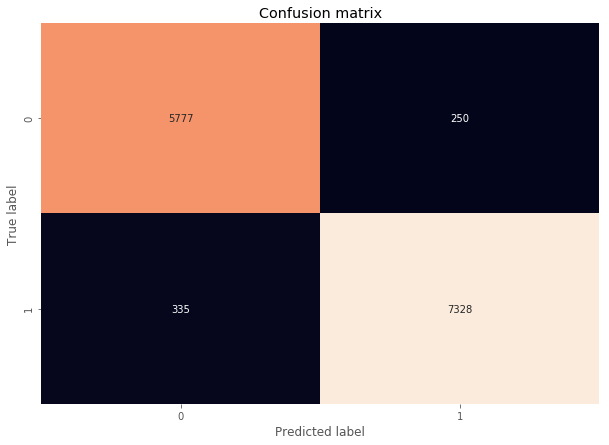

In [48]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [49]:
np.unique(preds,return_counts=True)

(array([0, 1]), array([6112, 7578]))

In [50]:
y_test.value_counts()

1    7663
0    6027
Name: stars, dtype: int64

# Confusion Matrix deep dive

### Basic terminology
- **True Positives (TP)**: we correctly predicted a positive review
- **True Negatives (TN)**: we correctly predicted that a negative review
- **False Positives (FP)**: we incorrectly predicted a positive review (a "Type I error")
- **False Negatives (FN)**: we incorrectly predicted a negative review (a "Type II error")

In [51]:
confusion = confusion_matrix(y_test, preds)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [52]:
confusion

array([[5777,  250],
       [ 335, 7328]])

# Metrics computed from a confusion matrix 

**Classification Accuracy**: Overall, how often is the classifier correct?


In [53]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, preds))

0.9572680788897006
0.9572680788897006


## Classification Error: Overall, how often is the classifier incorrect?
- Also known as "Misclassification Rate"


In [54]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, preds))

0.04273192111029949
0.04273192111029944


# Sensitivity: When the actual value is positive, how often is the prediction correct?
- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"


In [55]:
print(TP / float(TP + FN))
print(recall_score(y_test, preds))

0.956283439906042
0.956283439906042


# Specificity: When the actual value is negative, how often is the prediction correct?
- How "specific" (or "selective") is the classifier in predicting positive instances?

In [56]:
print(TN / float(TN + FP))

0.9585199933631989


**False Positive Rate**: When the actual value is negative, how often is the prediction incorrect?

In [57]:
print(FP / float(TN + FP))

0.04148000663680106


**Precision**: When a positive value is predicted, how often is the prediction correct?
- How "precise" is the classifier when predicting positive instances?

In [58]:
print(TP / float(TP + FP))
print(precision_score(y_test, preds))

0.9670097651095276
0.9670097651095276




Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.






### Conclusion:
- Confusion matrix gives you a more complete picture of how your classifier is performing
- Also allows you to compute various classification metrics, and these metrics can guide your model selection

### Which metrics should you focus on?
- Choice of metric depends on your business objective 
- spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)


# Data Bias
Although our model achieved quite a high accuracy, there are some issues with bias caused by the dataset.
Let’s take some singular reviews, and see what rating our model predicts for each one.

## Predicting a singular positive review


In [59]:
positive_review = yelp_class['text'][59]
positive_review

'I was referred by my optometrist to see Dr. Voo to take care of a hole in my retina.  I was quite impressed with her knowledge and skills.  She explained to me what exactly needed to be done to take care of the hole in my retina and calmed my anxiety regarding the procedure.  The laser coagulation surgery which she performed on me went well and I had no problems after the procedure.  I was in and out of her office within an hour and was able to drive home soon after that.  Dr. Voo and her staff are very professional and personable and I highly recommend her if you need to see a retina specialist.'

Seems like someone had the time of their life at this place, right? We can expect our model to predict a rating of 5 for this review.

In [60]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

1

Our model thinks this review is positive, just as we expected.
## Predicting a singular negative review

In [61]:
negative_review = yelp_class['text'][221]
negative_review

"The ONLY reason I am giving one (1) star is because I actually really like my doctor, Dr. Smith. Dr. Smith is kind, attentive and I truly feel like he cares about both my daughter and I. Besides Dr. Smith, there is NOTHING good I can say about this office/practice. I have been coming here for about a year. Because of the specific medicine I am on, it requires almost monthly doctors appointments and I have had nothing but troubled appointment after troubled appointment. The staff will not return phone calls or emails. When transferring my records over to Dr. Smith I had to call the office nearly 15 (I promise I am not exaggerating) times over and over again. I typed up all my paperwork prior to my appointment, including my records transfer paperwork. Upon leaving my first appointment, they were to get back in touch with me the next day. I didn't hear from them for a week. When I finally called they said they had been leaving me messages because they needed me to come back in and fill p

This is a slightly more negative review. So, we can expect our model to rate this a 1-star.

In [62]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

0